In [5]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import optuna
import h5py
import cv2
import os
from pathlib import Path
from dotenv import load_dotenv

load_dotenv()

RAW_DATA_DIR = Path(os.getenv('RAW_DATA_DIR'))
PREPROCESSED_DATA_DIR = Path(os.getenv('PREPROCESSED_DATA_DIR'))

# Results Analysis

In [56]:
filepath = '../results/rPPG_Study_cv_results_new_w_hist.pkl'
with open(filepath, 'rb') as f:
    raw_results = pickle.load(f)

In [60]:
results = pd.DataFrame()
for fold in raw_results:
    study = fold['study']
    results = pd.concat([results, study.trials_dataframe()])
results = results.drop(columns=['number', 'datetime_start', 'datetime_complete', 'duration'])
results

,value,params_HPF,params_LPF,params_base,params_blur,params_color_space,params_flip,params_high_pass,params_hist_crop,params_histogram,params_kernel_size,params_kernel_size_high_pass,params_lambda,params_midline_increment,params_scale,params_sharpen,params_times,system_attrs_completed_rung_0,state
0,0.453234,2.175588,3.670275,NaN,median,YUV,NaN,None,NaN,equalization,3.0,NaN,51.560365,NaN,NaN,NaN,1.0,NaN,COMPLETE
1,0.428083,0.030420,3.861010,-8.075653,box,Luv,True,our_custom,True,matching,9.0,7.0,125.998722,-3.490820,1.252508,False,3.0,NaN,COMPLETE
2,0.415570,4.638086,2.780612,NaN,None,Lab,NaN,None,NaN,None,NaN,NaN,188.119694,NaN,NaN,NaN,NaN,0.330664,COMPLETE
3,0.171083,1.871557,0.425732,NaN,median,RGB,NaN,None,NaN,equalization,3.0,NaN,192.311008,NaN,NaN,NaN,4.0,0.156494,COMPLETE
4,0.462256,0.129405,4.674357,NaN,gaussian,RGB,NaN,None,True,matching,9.0,NaN,136.576015,NaN,NaN,NaN,3.0,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.033872,4.792253,1.009927,-2.192777,box,RGB,True,our_custom,NaN,equalization,5.0,3.0,178.928626,4.143867,1.914337,False,1.0,NaN,COMPLETE
246,0.032964,4.918280,1.037728,4.884792,box,RGB,True,our_custom,NaN,equalization,5.0,9.0,177.438273,4.204087,1.321520,False,1.0,0.038114,COMPLETE
247,0.284388,4.668224,1.226941,5.379408,box,RGB,True,our_custom,False,matching,5.0,9.0,176.931689,4.479311,1.241385,False,1.0,0.284388,PRUNED
248,0.035627,4.998250,1.064683,4.949035,box,RGB,True,our_custom,NaN,equalization,5.0,9.0,178.227874,4.142856,1.308173,False,1.0,0.034677,COMPLETE


In [68]:
import joypy
from matplotlib import cm

In [93]:
def plot_joy(by: str, plot_title: str = None, df: pd.DataFrame = results):
    df = df[['value', f'params_{by}']].fillna('None')
    fig, ax = joypy.joyplot(df, by=f'params_{by}',
              colormap=cm.viridis, fade=False, grid='y', overlap=2, figsize=(7, 4),
              );
    plt.xticks(np.arange(0, df['value'].max(), 0.1))
    plt.xlabel('MAPE')
    if plot_title is None:
        plot_title = by
    plt.title(f'MAPE Distribution by {plot_title}')
    plt.show()

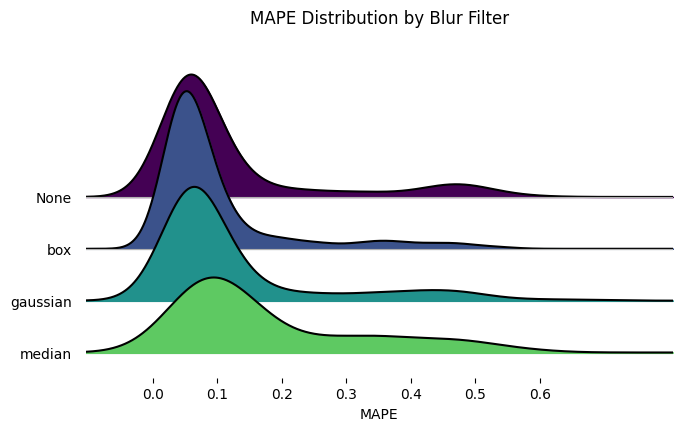

In [94]:
plot_joy('blur', 'Blur Filter')

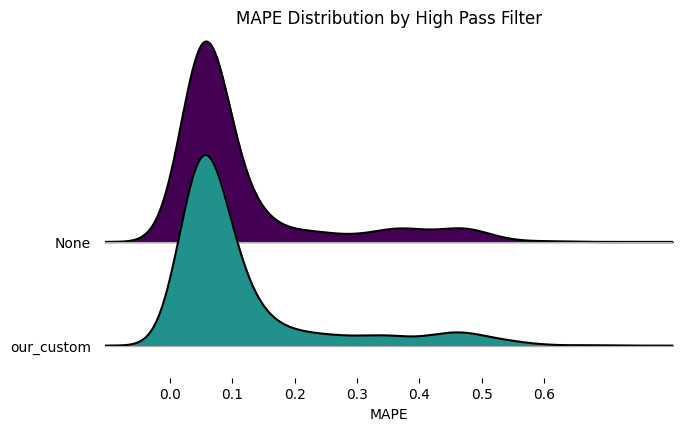

In [95]:
plot_joy('high_pass', 'High Pass Filter')

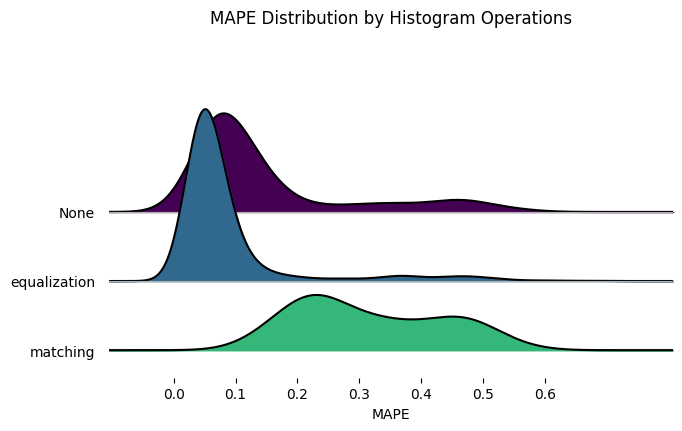

In [96]:
plot_joy('histogram', 'Histogram Operations')

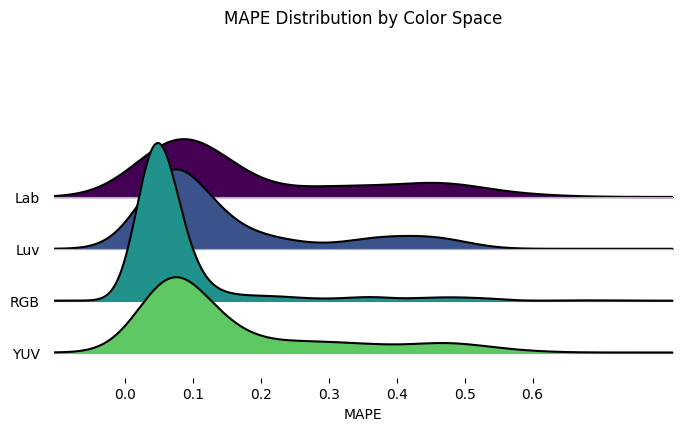

In [97]:
plot_joy('color_space', 'Color Space')

/home/netanel/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


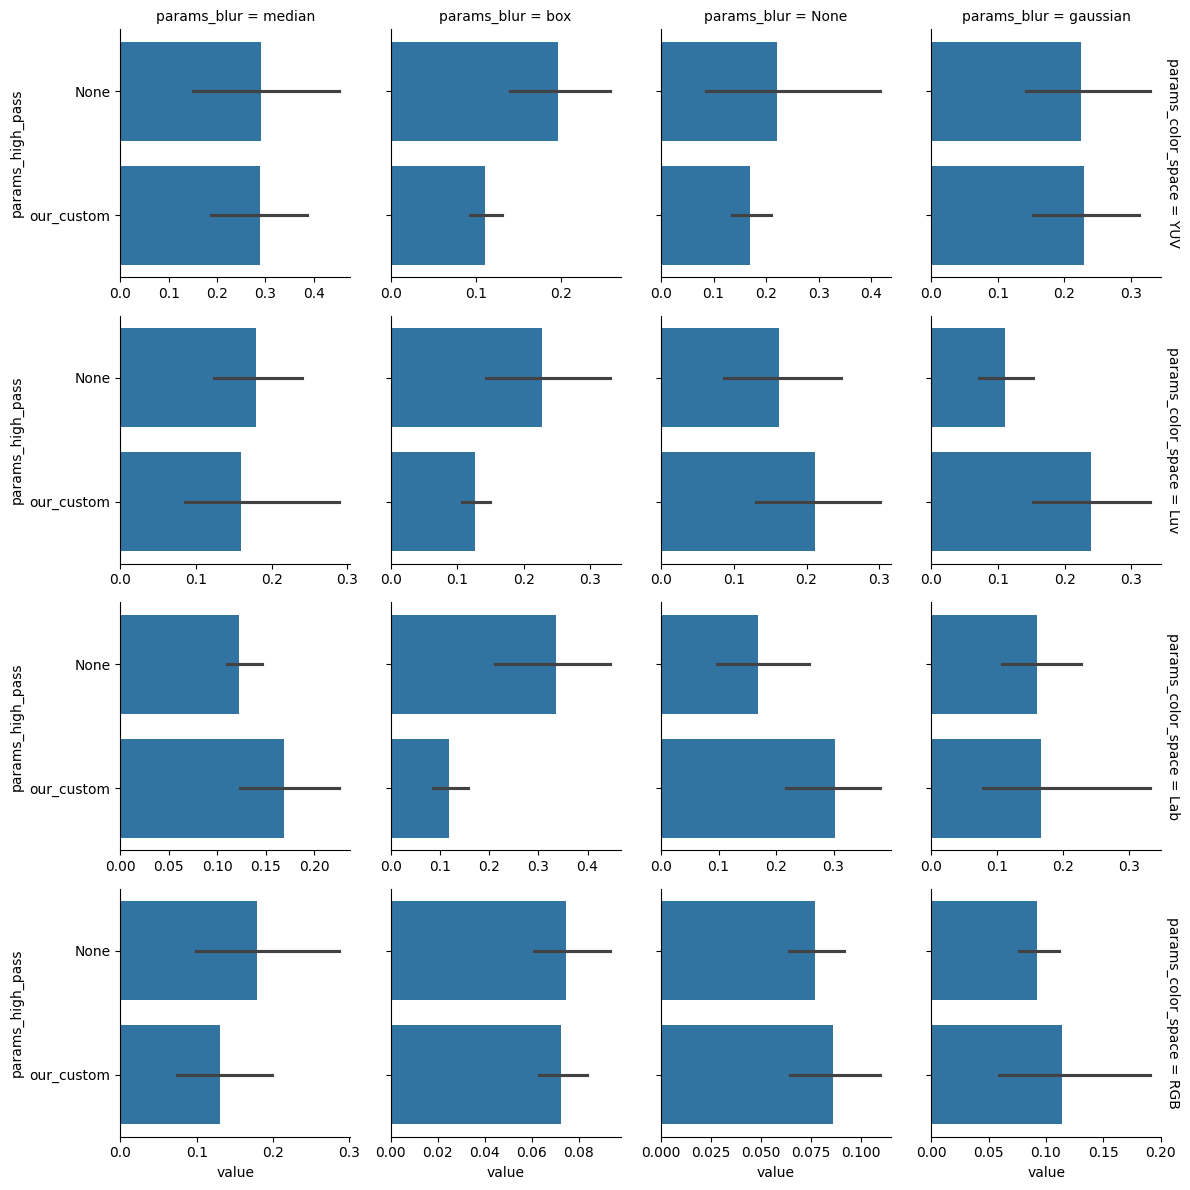

In [98]:
g = sns.FacetGrid(results.fillna('None'), row='params_color_space', col='params_blur',
                  sharex=False, sharey=True, margin_titles=True, )
g.map(sns.barplot, 'value', 'params_high_pass')
plt.tight_layout()

In [6]:
new_filepath = r'C:\Users\netan\Downloads\rPPG_Study_cv_results.pkl'
with open(new_filepath, 'rb') as f:
    new_results = pickle.load(f)

In [8]:
new_results_df = pd.DataFrame(new_results)
new_results_df

,fold_data,results,study
0,"{'train': ['subject37', 'subject14', 'subject4...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
1,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
2,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
3,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...
4,"{'train': ['subject49', 'subject15', 'subject3...","[{'trial': 0, 'subset': 'train', 'params': {'c...",<optuna.study.study.Study object at 0x0000023A...


In [ ]:
def evaluate_on_entire_dataset(params):
    for subject in subjects:
        

In [17]:
for i, study in enumerate(new_results_df.study):
    print(f'fold {i + 1} best parameters:')
    print(study.best_params)
    # here calculate the MAPE for the entire dataset using study.best_params
    params_results = evaluate_on_entire_dataset(study.best_params)
    print()

fold 1 best parameters:
{'color_space': 'RGB', 'blur': 'box', 'kernel_size': 7, 'times': 2.3440009243589093, 'high_pass': None, 'lambda': 52.24996199225873, 'LPF': 1.0264429916056717, 'HPF': 4.572394290425373}

fold 2 best parameters:
{'color_space': 'RGB', 'blur': 'gaussian', 'kernel_size': 3, 'times': 2.8551484181315865, 'high_pass': None, 'lambda': 85.82644041481346, 'LPF': 1.385990821841137, 'HPF': 3.4159464230879273}

fold 3 best parameters:
{'color_space': 'RGB', 'blur': None, 'high_pass': None, 'lambda': 64.61005429531875, 'LPF': 1.0644782775005812, 'HPF': 4.580565668743752}

fold 4 best parameters:
{'color_space': 'RGB', 'blur': None, 'high_pass': None, 'lambda': 130.65762447888972, 'LPF': 1.1698923346400187, 'HPF': 2.185542438277423}

fold 5 best parameters:
{'color_space': 'RGB', 'blur': 'median', 'kernel_size': 3, 'times': 1.5560521125506481, 'high_pass': None, 'lambda': 191.76717650720587, 'LPF': 1.1300499640173536, 'HPF': 3.298158559368826}



In [ ]:
def transform(frames, color_space, blur, high_pass, low_pass, kernel_size, ):

               # color spaces
               if color_space == 'RGB':  # default input
                    pass
                if color_space == 'HSV':
                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
                        frames[i] = new_frame

                if color_space == 'Lab':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2Lab)
                        frames[i] = new_frame

                if color_space == 'Luv':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2Luv)
                        frames[i] = new_frame

                if color_space == 'HLS':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2HLS)
                        frames[i] = new_frame

                if color_space == 'YUV':

                    for i, frame in enumerate(frames):
                        new_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2YUV)
                        frames[i] = new_frame


                # blur types
                if blur is not None:


                    for t in np.arange(times):
                        if blur == 'box':

                            for i, frame in enumerate(frames):
                                new_frame = cv2.blur(frame, (kernel_size,kernel_size))
                                frames[i] = new_frame


                        if blur == 'median':

                            for i, frame in enumerate(frames):
                                new_frame = cv2.medianBlur(frame, kernel_size)
                                frames[i] = new_frame


                        if blur == 'gaussian':

                            for i, frame in enumerate(frames):
                                new_frame = cv2.GaussianBlur(frame, (kernel_size,kernel_size),0)
                                frames[i] = new_frame


                if high_pass is not None:

                    if high_pass == 'our_custom':



                        custom_filter = np.zeros([k,k])

                        axis_2 = int((k-1)/2)

                        quarter = np.zeros([axis_2, axis_2])

                        for i in np.arange(axis_2):

                            for j in np.arange(axis_2):

                                quarter[j,i] = -(base+(i+j)*scale)

                        midline = quarter[axis_2-1] + midline_increment



                        custom_filter[:axis_2, :axis_2] = quarter

                        custom_filter[axis_2+1:, :axis_2] = np.flip(quarter,axis=0)

                        custom_filter[axis_2+1:, axis_2+1:] =  -1*np.flip(np.flip(quarter,axis=0),axis=1)

                        custom_filter[:axis_2, axis_2+1:] = -1*np.flip(quarter,axis=1)

                        custom_filter[axis_2,axis_2+1:] =  -1 * np.flip(midline)
                        custom_filter[axis_2, :axis_2] = midline

                        if sharpen:
                            custom_filter[axis_2+1, axis_2+1] = 1

                        if flip:
                            custom_filter = custom_filter.T

                        for i, frame in enumerate(frames):
                            new_frame = cv2.filter2D(src=frame, ddepth=-1, kernel=custom_filter)

                    if high_pass == 'laplacian':

                        for i, frame in enumerate(frames):
                            new_frame = cv2.Laplacian(frame, cv2.CV_64F, ksize=k)
                            frames[i] = new_frame

                # if transform is not None:

                #     transform types

                #     if transform == 'histogram_equalization':

                #         for i, frame in enumerate(frames):

                #             colorimage_b = cv2.equalizeHist(frame[:,:,0])
                #             colorimage_g = cv2.equalizeHist(frame[:,:,1])
                #             colorimage_r = cv2.equalizeHist(frame[:,:,2])

                #             # Next we stack our equalized channels back into a single image
                #             colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
                #             frames[i] = colorimage_e





                return frames

In [ ]:
for i, study in enumerate(new_results_df.study):
    print(f'fold {i + 1} best parameters:')
    print(study.best_params)
    print()

In [13]:
study.__dir__()

['study_name',
 '_study_id',
 '_storage',
 '_directions',
 'sampler',
 'pruner',
 '_stop_flag',
 '_thread_local',
 '__module__',
 '__doc__',
 '__init__',
 '__getstate__',
 '__setstate__',
 'best_params',
 'best_value',
 'best_trial',
 'best_trials',
 'direction',
 'directions',
 'trials',
 'get_trials',
 '_get_trials',
 'user_attrs',
 'system_attrs',
 'metric_names',
 'optimize',
 'ask',
 'tell',
 'set_user_attr',
 'set_system_attr',
 'trials_dataframe',
 'stop',
 'enqueue_trial',
 'add_trial',
 'add_trials',
 'set_metric_names',
 '_is_multi_objective',
 '_pop_waiting_trial_id',
 '_should_skip_enqueue',
 '_ask',
 '_tell',
 '_log_completed_trial',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

# Visualize Best Parameter Configurations

In [15]:
with h5py.File('../data/foreheads_all.h5') as f:
    print(f.keys())
    sub1 = np.array(f['subject1'])

<KeysViewHDF5 ['subject1', 'subject10', 'subject11', 'subject12', 'subject13', 'subject14', 'subject15', 'subject16', 'subject17', 'subject18', 'subject20', 'subject22', 'subject23', 'subject24', 'subject25', 'subject26', 'subject27', 'subject3', 'subject30', 'subject31', 'subject32', 'subject33', 'subject34', 'subject35', 'subject36', 'subject37', 'subject38', 'subject39', 'subject4', 'subject40', 'subject41', 'subject42', 'subject43', 'subject44', 'subject45', 'subject46', 'subject47', 'subject48', 'subject49', 'subject5', 'subject8', 'subject9']>


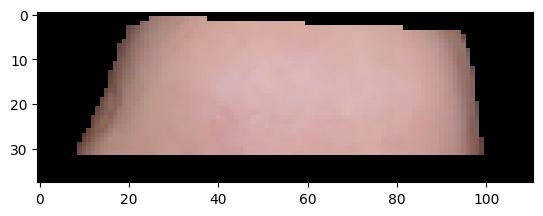

In [16]:
plt.imshow(sub1[0])

In [46]:
def combination_1(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.blur(new_frame, (7, 7))
        new_frame = cv2.blur(new_frame, (7, 7))
        new_frame = cv2.blur(new_frame, (7, 7))
        new_frames.append(new_frame)
    return np.array(new_frames)

def combination_2(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_RGB2Luv)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frames.append(new_frame)
    return np.array(new_frames)

def combination_3(frames):
    return frames

def combination_4(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.cvtColor(new_frame, cv2.COLOR_RGB2Luv)
        new_frames.append(new_frame)
    return np.array(new_frames)


def combination_5(frames):
    new_frames = []
    for frame in frames:
        new_frame = frame.copy()
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frame = cv2.GaussianBlur(new_frame, (3, 3), 0)
        new_frames.append(new_frame)
    return np.array(new_frames)

combinations = {'combination 1': combination_1,
                'combination 2': combination_2,
                'combination 3': combination_3,
                'combination 4': combination_4,
                'combination 5': combination_5}

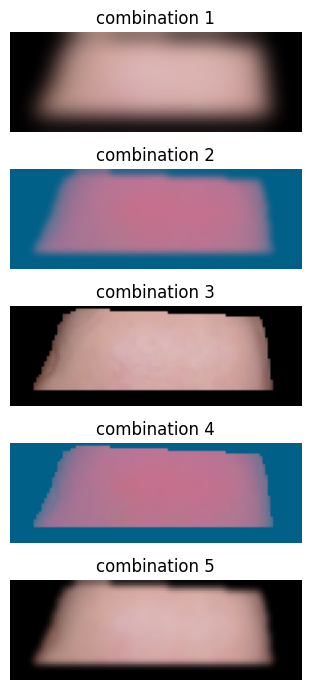

In [52]:
fig, axs = plt.subplots(5, figsize=(10, 7))

for com, ax in zip(combinations, axs):
    ax.imshow(combinations[com](sub1)[0])
    ax.axis('off')
    ax.set_title(com)

plt.tight_layout()
plt.show()